In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 5.7 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
# import pandas as pd

In [ ]:
import matplotlib as plt
import geopandas as gpd
import pandas as pd
from shapely.ops import nearest_points

# import hdbscan
import numpy as np
# import geoplot
# 
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing, cluster
import matplotlib.pyplot as plt

# import osmnx as ox

In [ ]:
!pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 KB 3.2 MB/s eta 0:00:00


In [ ]:
import contextily as cx

In [ ]:
!gdown --id 1AJ0Fas7d_KRinfJ8beBIv1dhNW1EUz0U
!gdown --id 1wM4HGiXAuweHg8K5zwlicAkytzMRk5JZ
!gdown --id 1EBOMjjptSjBiQ3YUFM72zht4PVs-3vMG
!gdown --id 1HEpAL4_YL71xy-hMrdRW8ytkmENzrZ_C

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1AJ0Fas7d_KRinfJ8beBIv1dhNW1EUz0U
To: /content/spb_big.geojson
100% 273k/273k [00:00<00:00, 49.7MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1wM4HGiXAuweHg8K5zwlicAkytzMRk5JZ
To: /content/distrct_spb.geojson
100% 725k/725k [00:00<00:00, 140MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.co

In [ ]:
# система координат должна быть 4326

# загружаем границы и районы питера 
spb = gpd.read_file("/content/spb.geojson")  
# spb = spb.set_crs('epsg:4326')
spb = spb.to_crs('epsg:4326')

# граница спб 
spb_big = gpd.read_file("/content/spb_big.geojson")  
spb_big = spb_big.to_crs('epsg:4326')
# spb_big = spb_big.to_crs('epsg:3857')

# районы спб 
district_spb = gpd.read_file("/content/distrct_spb.geojson") 
# district_spb = district_spb.to_crs('epsg:4326') 
district_spb = district_spb[['osm_id','geometry']]
district_spb['area'] = district_spb['geometry'].area
district_spb = district_spb.sort_values(by='area', ascending=True)
district_spb = district_spb.head(len(district_spb)-1)
# district_spb = district_spb.to_crs('epsg:3857')

# кварталы спб
kvartal = gpd.read_file("/content/kvartal.geojson")  
# kvartal = kvartal.to_crs('epsg:4326')
# kvartal = kvartal.to_crs('epsg:3857')
kvartal = kvartal[['osm_id','geometry']]

In [ ]:
!gdown --id 1dRUAJEUK5n22QdPN-tQoTUGRn4bl5Rio
df = pd.read_excel('/content/testexprt_SPB_TB.xlsx')
df['Ч'] = pd.to_numeric(df['Ч'] , errors='coerce')
df['Н'] = pd.to_numeric(df['Н'] , errors='coerce')
df['Дата системы'] = pd.to_datetime(df['Дата системы'])
df['STARTTIME'] = pd.to_datetime(df['STARTTIME'])
df['ENDTIME'] = pd.to_datetime(df['ENDTIME'])
# удаляем пропущенные значения
df = df.dropna()
# переименовываем колонки
df.columns = ['id', 'date_system', 's_index', 'type_disease', 'resultat', 'start_time', 'end_time', 'a-index', 'lng', 'lat']
# из датафрэйма создаем геодатафрэйм
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lng, df.lat))
# df = df.set_crs('epsg:4326')
# df = df.to_crs('epsg:3857')
df_coord = df[['id','lng', 'lat']]
df_coord = gpd.GeoDataFrame(df_coord, geometry=gpd.points_from_xy(df_coord.lng, df_coord.lat))
# df_coord = df_coord.set_crs('epsg:4326')
# df_coord = df_coord.to_crs('epsg:3857')

df_coord.to_file('df_coord.geojson') 

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dRUAJEUK5n22QdPN-tQoTUGRn4bl5Rio
To: /content/testexprt_SPB_TB.xlsx
100% 474k/474k [00:00<00:00, 73.5MB/s]


Функция для рассчета количества точек в полигоне и плотности этих точек 

In [ ]:
def count_in_poligon(poligon, point,field_for_group):
  poligon_count = gpd.sjoin(poligon, point, how='inner', predicate='intersects').groupby(f'{field_for_group}',dropna=False)['id'].agg(['count']).reset_index().merge(poligon[['geometry',f'{field_for_group}']], left_on=f'{field_for_group}', right_on=f'{field_for_group}')
  poligon_count = gpd.GeoDataFrame(poligon_count, geometry = poligon_count['geometry'])
  poligon_count['area'] = poligon_count.geometry.area
  poligon_count['density'] = poligon_count['count']/poligon_count['area']
  return(poligon_count)

Плотность распределения заболеваний 

Text(0.5, 46.673978173028004, 'Плотность распределения заболеваний по районам')

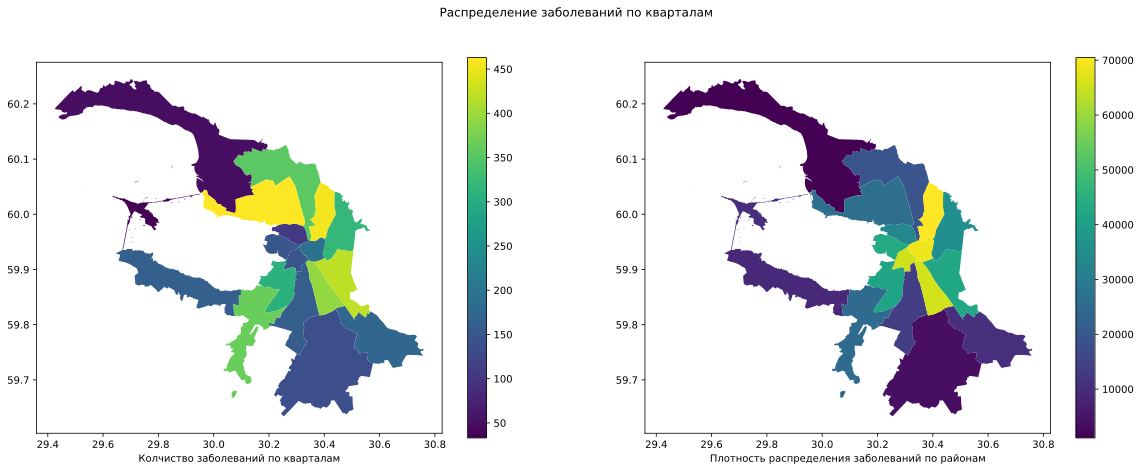

In [ ]:
# fig, ax = plt.subplots(1, 1)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

#add title
fig.suptitle('Распределение заболеваний по кварталам')
# ax.set_title('Simple plot')
district_spb_count = count_in_poligon(district_spb, df,'osm_id')
district_spb_count = district_spb_count.set_crs('epsg:4326')
# district_spb_count = district_spb_count.to_crs('epsg:3857')
district_spb_count.plot(column='count',ax=ax[0], legend=True)
ax[0].set_xlabel('Колчиство заболеваний по кварталам')
district_spb_count.plot(column='density',ax=ax[1], legend=True)
ax[1].set_xlabel('Плотность распределения заболеваний по районам')
# cx.add_basemap(ax[0])

Text(0.5, 42.0, 'Плотность распределения заболеваний по кварталам')

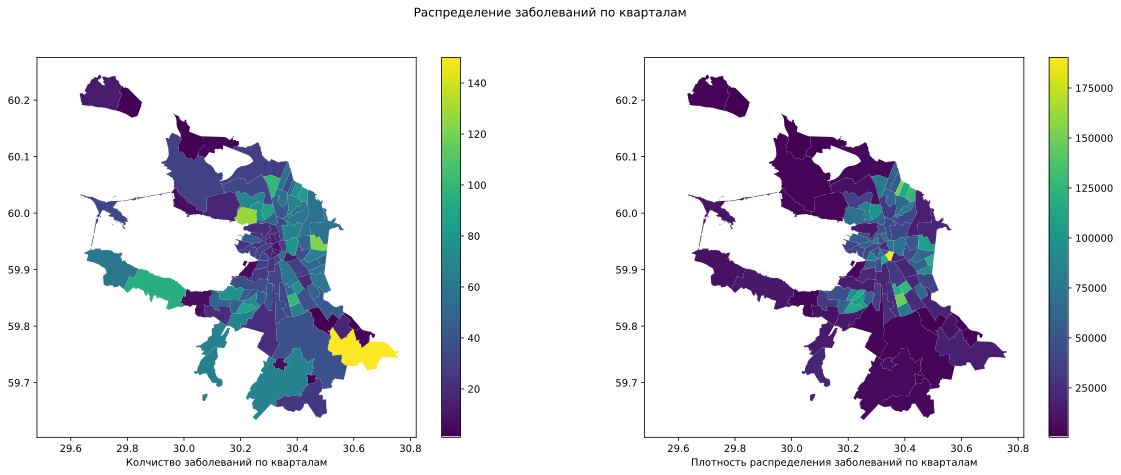

In [ ]:
# fig, ax = plt.subplots(1, 1)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

#add title
fig.suptitle('Распределение заболеваний по кварталам')
# ax.set_title('Simple plot')
kvartal_spb_count = count_in_poligon(kvartal, df,'osm_id')
kvartal_spb_count = kvartal_spb_count.set_crs('epsg:4326')
# district_spb_count = district_spb_count.to_crs('epsg:3857')
kvartal_spb_count.plot(column='count',ax=ax[0], legend=True)
ax[0].set_xlabel('Колчиство заболеваний по кварталам')
kvartal_spb_count.plot(column='density',ax=ax[1], legend=True)
ax[1].set_xlabel('Плотность распределения заболеваний по кварталам')
# cx.add_basemap(ax[0])

Построение буфера в 30 метров от каждой точки

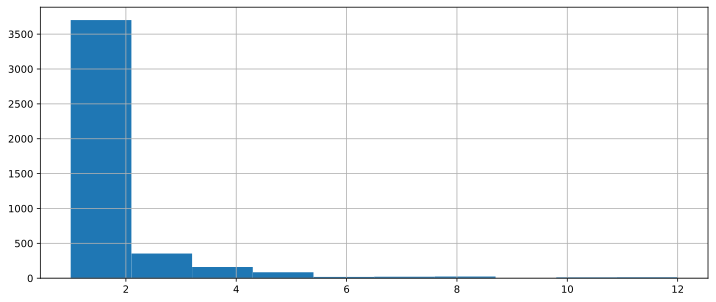

In [ ]:
df_coord = df_coord.set_crs('epsg:4326')
df_coord = df_coord.to_crs('epsg:3857')
df = df.set_crs('epsg:4326')
df = df.to_crs('epsg:3857')

df_coord['buffer'] = df_coord.geometry.buffer(30)
df_buffer = gpd.GeoDataFrame(df_coord['id'], geometry=df_coord['buffer'])
df_buffer.columns = ['osm_id', 'geometry']
df_buffer_count = count_in_poligon(df_buffer, df, 'osm_id')
df_buffer_count = gpd.GeoDataFrame(df_buffer_count, geometry=df_buffer_count['geometry'])
df_buffer_count.to_file('df_buffer_count.geojson', driver='GeoJSON') 
df_buffer_count.to_file('dataframe.geojson', driver='GeoJSON') 
df_buffer_count['osm_id'] = df_buffer_count['osm_id'].astype('float64')
df_buffer_count['count'] = df_buffer_count['count'].astype('float64')
df_buffer_count['count'].hist(figsize=(12,5));

df_buffer_count.to_file('df_buffer_count.geojson') 

Сгруппировали точки по количеству точек в буфере 

In [ ]:
df_buffer_count_group = df_buffer_count.groupby(['count']).count().reset_index()
df_buffer_count_group = df_buffer_count_group[['count','osm_id']]
df_buffer_count_group['part']=df_buffer_count_group['osm_id']/df_buffer_count_group['osm_id'].sum()
df_buffer_count_group

count  osm_id      part
0    1.0    2667  0.608210
1    2.0    1034  0.235804
2    3.0     354  0.080730
3    4.0     160  0.036488
4    5.0      85  0.019384
5    6.0      18  0.004105
6    7.0      21  0.004789
7    8.0      24  0.005473
8   10.0      10  0.002281
9   12.0      12  0.002737

Выберем только те точки, у которых в буфер попадает больше двух точек

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0aaf3b940>]],
      dtype=object)

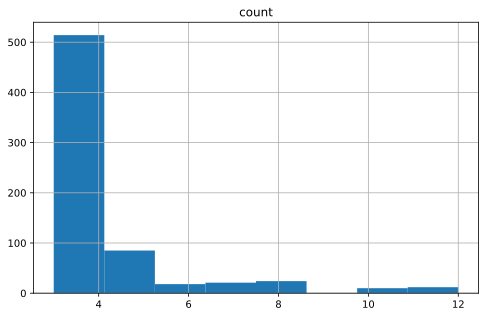

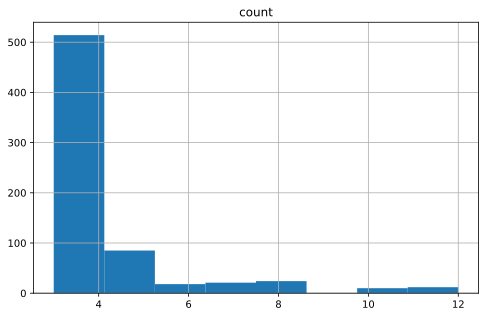

In [ ]:
df_buffer_count_more_two = df_buffer_count[(df_buffer_count['count'] > 2)]
df_buffer_count_more_two.to_file('df_buffer_count_more_two_poly.geojson')
# df_buffer_count_more_two['geometry'] = df_buffer_count_more_two.centroid
df_buffer_count_more_two = gpd.GeoDataFrame(df_buffer_count_more_two, geometry=df_buffer_count_more_two['geometry'])
df_buffer_count_more_two.sort_values(by = 'count').hist('count', bins = len(df_buffer_count_more_two['count'].unique()))
df_buffer_count_more_two['centroid'] = df_buffer_count_more_two.geometry.centroid
df_buffer_count_more_two = df_buffer_count_more_two[['centroid','osm_id','count']]
df_buffer_count_more_two = gpd.GeoDataFrame(df_buffer_count_more_two[['osm_id','count']], geometry=df_buffer_count_more_two['centroid'])
# df_buffer_count_more_two = df.columns[['geometry','osm_id','count']]
# df_buffer_count_more_two = df_buffer_count_more_two.set_crs('epsg:4326')
df_buffer_count_more_two = df_buffer_count_more_two.to_crs('epsg:3857')
df_buffer_count_more_two['lng'] = df_buffer_count_more_two.centroid.x
df_buffer_count_more_two['lat'] = df_buffer_count_more_two.centroid.y
df_buffer_count_more_two.to_file('df_buffer_count_more_two.geojson') 
df_buffer_count_more_two['osm_id'] = df_buffer_count_more_two['osm_id'].apply(np.int64)

In [ ]:
df_buffer_count_more_two

osm_id  count                         geometry           lng  \
3     1000004    4.0  POINT (3391785.940 8381652.789)  3.391786e+06   
23    1000029    3.0  POINT (3367083.922 8388599.850)  3.367084e+06   
24    1000030    3.0  POINT (3392325.716 8379521.636)  3.392326e+06   
36    1000043    4.0  POINT (3383291.895 8409026.812)  3.383292e+06   
50    1000061    7.0  POINT (3370359.373 8402235.844)  3.370359e+06   
...       ...    ...                              ...           ...   
4348  1010230    3.0  POINT (3362451.851 8363412.949)  3.362452e+06   
4353  1010265    3.0  POINT (3385404.629 8409879.709)  3.385405e+06   
4364  1010388    3.0  POINT (3386734.071 8363922.452)  3.386734e+06   
4373  1010577    3.0  POINT (3361459.460 8397596.036)  3.361459e+06   
4374  1010589    3.0  POINT (3385975.942 8386937.391)  3.385976e+06   

               lat  
3     8.381653e+06  
23    8.388600e+06  
24    8.379522e+06  
36    8.409027e+06  
50    8.402236e+06  
...            ...  
4348  8.363413e+06  
4353  8.409880e+06  
4364  8.363922e+06  
4373  8.397596e+06  
4374  8.386937e+06  

[684 rows x 5 columns]

In [ ]:
df_buffer_count_more_two

osm_id  count                         geometry           lng  \
3     1000004    4.0  POINT (3391785.940 8381652.789)  3.391786e+06   
23    1000029    3.0  POINT (3367083.922 8388599.850)  3.367084e+06   
24    1000030    3.0  POINT (3392325.716 8379521.636)  3.392326e+06   
36    1000043    4.0  POINT (3383291.895 8409026.812)  3.383292e+06   
50    1000061    7.0  POINT (3370359.373 8402235.844)  3.370359e+06   
...       ...    ...                              ...           ...   
4348  1010230    3.0  POINT (3362451.851 8363412.949)  3.362452e+06   
4353  1010265    3.0  POINT (3385404.629 8409879.709)  3.385405e+06   
4364  1010388    3.0  POINT (3386734.071 8363922.452)  3.386734e+06   
4373  1010577    3.0  POINT (3361459.460 8397596.036)  3.361459e+06   
4374  1010589    3.0  POINT (3385975.942 8386937.391)  3.385976e+06   

               lat  
3     8.381653e+06  
23    8.388600e+06  
24    8.379522e+06  
36    8.409027e+06  
50    8.402236e+06  
...            ...  
4348  8.363413e+06  
4353  8.409880e+06  
4364  8.363922e+06  
4373  8.397596e+06  
4374  8.386937e+06  

[684 rows x 5 columns]

Вычтем из основого датафрэйма точки

In [ ]:
df_part = df_coord.merge(df_buffer_count_more_two.drop_duplicates(), left_on='id', right_on='osm_id', how='left', indicator=True)
df_part = df_part[df_part['_merge'] == 'left_only']
df_part = df_part[['id','geometry_x']]
df_part.insert(loc= len(df_part.columns) , column='count', value = 1)
df_part.rename(columns = {'id':'cluster','geometry_x':'geometry'}, inplace = True)

Воспользуемся алгоритмом DBSCAN, чтобы объединить эти точки в о

In [ ]:
from sklearn.cluster import DBSCAN
X = df_buffer_count_more_two[["lng","lat"]]
# X = np.radians(df_buffer_count_more_two[["lng","lat"]])
dbscan = DBSCAN(eps=30, min_samples = 2).fit(X)
labels = dbscan.labels_
df_buffer_count_more_two["cluster"] = dbscan.labels_

In [ ]:
df_buffer_count_more_two = gpd.GeoDataFrame(df_buffer_count_more_two, geometry=df_buffer_count_more_two.geometry)
df_buffer_count_more_two_polygon = df_buffer_count_more_two.dissolve("cluster").convex_hull.reset_index()
df_buffer_count_more_two_polygon.columns = ['cluster','geometry']
cluster_count = df_buffer_count_more_two.groupby('cluster').agg('count').reset_index()[['cluster','count']]
df_buffer_count_more_two_polygon = df_buffer_count_more_two_polygon.merge(cluster_count)

Соединили данные в один датафрэйм

In [ ]:
frames = [df_part, df_buffer_count_more_two_polygon]
df_main = pd.concat(frames, ignore_index=True)[['geometry','count']]
df_main = gpd.GeoDataFrame(df_main, geometry=df_main['geometry'])
df_main = df_main.loc[df_main.geometry.geometry.type=='Point']
df_main['lng'] = df_main.centroid.x
df_main['lat'] = df_main.centroid.y
df_main.to_file('df_main.geojson') 

In [ ]:
# df_main = df_main.reset_index()
columns = ['lat','lng','count','geometry']
df_main = df_main.reindex(columns=columns)
# df_main.count = df_main.count.to_series().apply(lambda x: x.strip())

КЛАСТЕРИЗАЦЯ

Найдем оптимальное количество классов 

1) df_main - датафрэйм, где точки, находящиеся рядом объеденены. Учитываем вес точки - количество объединенных точек

2) df_coords - датафрэйм без объединенных точек

Для задачи необходимо, чтобы площадь каждого кластера равнялась площади одного-двух кварталов

Квартал может проедставлять собой квадрат 0,25 км^2 https://ru.wikipedia.org/wiki/%D0%9A%D0%B2%D0%B0%D1%80%D1%82%D0%B0%D0%BB_(%D0%B3%D1%80%D0%B0%D0%B4%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D1%81%D1%82%D0%B2%D0%BE)#:~:text=%D0%92%20%D0%BD%D0%BE%D0%B2%D1%8B%D1%85%20%D1%80%D0%B0%D0%B9%D0%BE%D0%BD%D0%B0%D1%85%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82%2D%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B0,(0%2C25%20%D0%BA%D0%BC%C2%B2).

In [ ]:
kvartal_spb_count.sort_values(by='area', ascending=False)

osm_id  count                                           geometry  \
79   356826     38  MULTIPOLYGON (((30.48895 59.68962, 30.48980 59...   
0   1115677     30  MULTIPOLYGON (((30.05388 60.10040, 30.05393 60...   
82   359179     67  MULTIPOLYGON (((30.31000 59.74415, 30.31025 59...   
73   337423    150  MULTIPOLYGON (((30.55606 59.73752, 30.55593 59...   
92   367377     95  MULTIPOLYGON (((29.97774 59.83419, 29.94434 59...   
..      ...    ...                                                ...   
49  1187393     12  MULTIPOLYGON (((30.31180 59.96561, 30.31286 59...   
9   1123299     31  MULTIPOLYGON (((30.33941 59.91552, 30.33352 59...   
64  1198059     10  MULTIPOLYGON (((30.31235 59.93727, 30.31234 59...   
5   1121516     13  MULTIPOLYGON (((30.30569 59.92679, 30.30573 59...   
50  1187394     14  MULTIPOLYGON (((30.30521 59.95766, 30.30523 59...   

        area        density  
79  0.016966    2239.818805  
0   0.014402    2083.042914  
82  0.014227    4709.461696  
73  0.009276   16170.456381  
92  0.007817   12153.174769  
..       ...            ...  
49  0.000277   43293.641791  
9   0.000264  117345.255450  
64  0.000188   53328.049976  
5   0.000177   73555.329459  
50  0.000171   81642.879534  

[103 rows x 5 columns]

In [ ]:
kvartal_spb_count['count'].describe()

count    103.000000
mean      42.592233
std       29.264325
min        1.000000
25%       20.000000
50%       38.000000
75%       59.500000
max      150.000000
Name: count, dtype: float64

In [ ]:
min_count = kvartal_spb_count[(kvartal_spb_count['count'] < )]

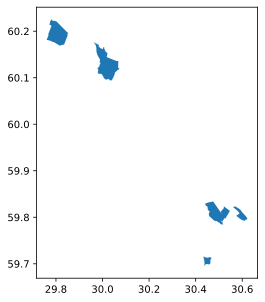

In [ ]:
min_count.plot()

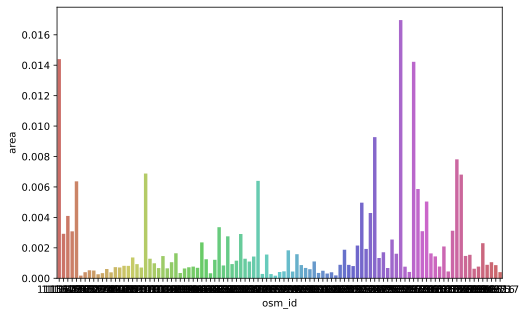

In [ ]:
sns.barplot(
    x="osm_id", 
    y="area", 
    hue_order=kvartal_spb_count['area'],
    palette='hls', 
    data=kvartal_spb_count
    # orient="h"
);

fig, ax = plt.subplots(figsize = (9,4))
ax = sns.distplot(data['Sales'], kde=True, rug=True, bins = 10)

In [ ]:
X = df_main[["lat","lng","count"]]
max_k = 100
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
k

31

Классифицируем Kmeans с количествов классов = 7 

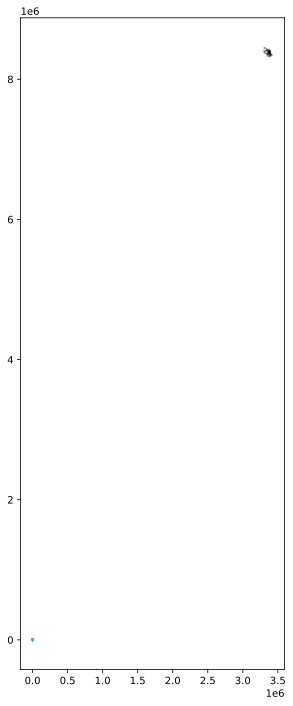

silhouette_score 0.4536787605671209
calinski_harabasz_score 5325.994750992103
davies_bouldin_score 0.6999324329891338


In [ ]:
k = 7
X = df_coord[["lat","lng"]]
model = cluster.KMeans(n_clusters=k, init='k-means++')
df_coord["cluster_kmeans_1"] = model.fit_predict(X)

fig, ax = plt.subplots(figsize=(12, 12))
ax.set_aspect('equal')

# kvartal_spb_count = kvartal_spb_count.set_crs('epsg:4326')
# kvartal_spb_count = kvartal_spb_count.to_crs('epsg:3857')
kvartal_spb_count.plot(ax=ax, alpha=0.3, edgecolor='k')

# df_coord = df_coord.to_crs('epsg:4326')
# df_coord = df_coord.to_crs('epsg:3857')
df_coord.plot(ax=ax, marker='o',markersize=2, column='cluster_kmeans_1')
# cx.add_basemap(ax)
plt.show();
print('silhouette_score', metrics.silhouette_score(X, model.labels_))
print('calinski_harabasz_score' , metrics.calinski_harabasz_score(X, model.labels_))
print('davies_bouldin_score' , metrics.davies_bouldin_score(X, model.labels_))




Посмотрим как изменяются метрики кластеризации, если возьмем от 5 до 30 кластеров

In [ ]:
cluster_df = pd.DataFrame(columns = ['count_cluster','cluster_labels', 'silhouette_score', 'calinski_harabasz_score','davies_bouldin_score'])

for k in range(5,30):
  model = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
  cluster_labels = model.fit_predict(X)
  silhouette_score = metrics.silhouette_score(X, model.labels_)
  calinski_harabasz_score = metrics.calinski_harabasz_score(X, model.labels_)
  davies_bouldin_score = metrics.davies_bouldin_score(X, model.labels_)
  cluster_df = cluster_df.append({'count_cluster': k, 'cluster_labels': cluster_labels, 'silhouette_score': silhouette_score, 'calinski_harabasz_score': calinski_harabasz_score,'davies_bouldin_score':davies_bouldin_score}, ignore_index=True)

In [ ]:
cluster_df.sort_values(['silhouette_score','calinski_harabasz_score','davies_bouldin_score'], ascending=(False, False, True)).head()

count_cluster                                     cluster_labels  \
19            24  [15, 15, 13, 15, 11, 3, 3, 3, 3, 3, 3, 1, 23, ...   
23            28  [14, 14, 3, 19, 13, 13, 0, 0, 13, 13, 13, 2, 1...   
22            27  [0, 0, 16, 0, 25, 25, 8, 8, 25, 25, 25, 10, 20...   
6             11  [2, 2, 2, 2, 10, 10, 10, 10, 10, 10, 10, 1, 8,...   
20            25  [13, 13, 1, 13, 3, 3, 20, 20, 3, 3, 3, 19, 11,...   

    silhouette_score  calinski_harabasz_score  davies_bouldin_score  
19          0.486586              8388.465401              0.617802  
23          0.486385              8734.368385              0.628182  
22          0.482838              8549.405273              0.628536  
6           0.482046              5867.509686              0.709369  
20          0.481660              8471.055316              0.626824

DBSCAN

In [ ]:
cluster_df = pd.DataFrame(columns = ['count_cluster','cluster_labels', 'silhouette_score', 'calinski_harabasz_score','davies_bouldin_score'])

for k in range(5,30):
  model = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
  cluster_labels = model.fit_predict(X)
  silhouette_score = metrics.silhouette_score(X, model.labels_)
  calinski_harabasz_score = metrics.calinski_harabasz_score(X, model.labels_)
  davies_bouldin_score = metrics.davies_bouldin_score(X, model.labels_)
  cluster_df = cluster_df.append({'count_cluster': k, 'cluster_labels': cluster_labels, 'silhouette_score': silhouette_score, 'calinski_harabasz_score': calinski_harabasz_score,'davies_bouldin_score':davies_bouldin_score}, ignore_index=True)
  
  # plt.figure() #this creates a new figure on which your plot will appear
  # sns.countplot(silhouette_score);

  # print('For n_clusters=', cluster, 
  #       'silhouette_score', silhouette_score, 
  #       'calinski_harabasz_score', calinski_harabasz_score, 
  #       'davies_bouldin_score', davies_bouldin_score)

Три метрики кластеризации 


1.   Коэффициент силуэта - SC основан на том, насколько четко определены кластеры, (1 лучшее)
2.   Индекс Калинского-Харабаша - отношение суммы дисперсии между кластерами и дисперсии внутри кластера. Чем выше значение, тем лучше. 
3. Индекс Дэвиса-Булдина (DBI)  - оценивает разделенность между кластерами. 0 - лучшая оценка> 


https://www.sciencedirect.com/science/article/pii/S2590005622000406

In [ ]:
cluster_df.sort_values(['silhouette_score','calinski_harabasz_score','davies_bouldin_score'], ascending=(False, False, True)).head()

In [ ]:
model = cluster.KMeans(n_clusters=24, init='k-means++')
df_coord["cluster_kmeans_1"] = model.fit_predict(X)
sns.scatterplot(x="lng", y="lat", data=df_coord,hue='cluster_kmeans_1', palette="deep",legend= False)

In [ ]:
cluster_df.sort_values('calinski_harabasz_score',ascending=False).head()

count_cluster                                     cluster_labels  \
23            28  [14, 14, 3, 19, 13, 13, 0, 0, 13, 13, 13, 2, 1...   
22            27  [0, 0, 16, 0, 25, 25, 8, 8, 25, 25, 25, 10, 20...   
20            25  [13, 13, 1, 13, 3, 3, 20, 20, 3, 3, 3, 19, 11,...   
24            29  [20, 20, 10, 20, 24, 24, 2, 2, 24, 24, 24, 14,...   
21            26  [8, 8, 21, 8, 6, 6, 10, 10, 6, 6, 6, 24, 22, 2...   

    silhouette_score  calinski_harabasz_score  davies_bouldin_score  
23          0.486385              8734.368385              0.628182  
22          0.482838              8549.405273              0.628536  
20          0.481660              8471.055316              0.626824  
24          0.472041              8468.637173              0.651407  
21          0.472486              8414.022449              0.636634

In [ ]:
model = cluster.KMeans(n_clusters=28, init='k-means++')
df_coord["cluster_kmeans_1"] = model.fit_predict(X)
sns.scatterplot(x="lng", y="lat", data=df_coord,hue='cluster_kmeans_1', palette="deep")

TypeError: ignored

<Figure size 576x360 with 1 Axes>

In [ ]:
sns_plot = sns.pairplot(cluster_df)

TypeError: ignored

<Figure size 720x720 with 20 Axes>

In [ ]:
import numpy as np
import math

In [ ]:
# кривая, чтобы найти минимальное расстоние 
X = X.sort_values(by=["lat","lng"])
df2 = pd.DataFrame(columns = ['index', 'distance'])
for i in range(0, len(X)-1):
  dist = math.dist(X.iloc[i],X.iloc[i+1])
  # dist = np.linalg.norm(X.iloc[i]-X.iloc[i+1])
  df2 = df2.append({'index': str(i), 'distance': dist}, ignore_index=True)

# df2 = df2.sort_values(by=['distance'])
# plt.scatter(df2['index'], df2['distance'])
# plt.show()
# print("Considering min distance between 0.2 to 0.4")
# df3 = df2[df2['distance'] < 0.4]
# df3 = df3.sort_values(by=['distance'])
# plt.scatter(df3['index'], df3['distance'])
# plt.show()

Описание рсстояния между двумя соседними точками

In [ ]:
print(df2.distance.describe())

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# range_eps = [0.1, 0.2, 0.3, 0.4, 0.5]


for i in np.arange(0.001, 0.003, 0.00005):
  print("eps value is "+str(i))
  model = DBSCAN(eps=i, min_samples=5).fit(X)
  # cluster_labels = model.fit_predict(X)
  core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
  core_samples_mask[model.core_sample_indices_] = True
  # print(core_samples_mask)
  labels = model.labels_
  print(set(labels))
  silhouette_avg = metrics.silhouette_score(X, labels)
  print("For eps value ="+str(i), labels,
  "The average silhouette_score is :", silhouette_avg)

In [ ]:
from sklearn.cluster import DBSCAN
X = np.radians(df[["lng","lat"]])
dbscan = DBSCAN(eps=0.00016).fit(X)
labels = dbscan.labels_
df["cluster"] = dbscan.labels_
# metrics.silhouette_score(X, dbscan.labels_)

sns.scatterplot(x="lng", y="lat", data=df,hue='cluster', palette="deep")
# print(data.tail())

TypeError: ignored

<Figure size 576x360 with 1 Axes>

In [ ]:
g = sns.relplot(data = df, x="lng", y = "lat",
                hue = 'cluster',
                palette="Paired",
                kind = 'scatter')

TypeError: ignored

<Figure size 408.75x360 with 1 Axes>

In [ ]:
from scipy.spatial import ConvexHull
from matplotlib.colors import to_rgba

In [ ]:
sns.set_style('whitegrid')

df_new = df.loc[df['cluster'] != -1]
data = df_new
xcol = 'lng'
ycol = 'lat'

hues = df["cluster"].unique()
colors = sns.color_palette("Paired", len(hues))
palette = {hue_val: color for hue_val, color in zip(hues, colors)}
g = sns.relplot(data=data, x=xcol, y=ycol, hue="cluster", palette=palette, kind='scatter')

def overlay_cv_hull_dataframe(x, y, color, data, hue):
    # Get the Convex Hull for each group based on hue
    for hue_val, group in data.groupby(hue):
        hue_color = palette[hue_val]
        points = group[[x, y]].values
        hull = ConvexHull(points)
        plt.fill(points[hull.vertices, 0], points[hull.vertices, 1],
                 facecolor=to_rgba(hue_color, 0.2),
                 edgecolor=hue_color)

# Overlay convex hulls
g.map_dataframe(overlay_cv_hull_dataframe, x=xcol, y=ycol, hue='cluster')
g.set_axis_labels(xcol, ycol)

plt.show()

QhullError: ignored

TypeError: ignored

<Figure size 408.75x360 with 1 Axes>

Подберем количество кластеров

In [ ]:
min_samples = [1,2,3,4,5,6,7,8,9,10]
for i in min_samples :
  print("min_samples value is "+str(i))
  db = DBSCAN(eps=0.00016, min_samples=i).fit(X)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  # Ignoring the Label '-1' as its for the outliers
  labels = set([label for label in db.labels_ if label >= 0])
  print(set(labels))
  print("For min_samples value ="+str(i), "Total no. of clusters are "+ str(len(set(labels))))

In [ ]:
# from sklearn.cluster import DBSCAN
min_samples = [1,2,3,4,5,6,7,8,9,10]
for i in min_samples :
  dbscan = DBSCAN(eps=0.00016, min_samples = i).fit(X)
  labels = dbscan.labels_
  df["cluster"] = dbscan.labels_
  # metrics.silhouette_score(X, dbscan.labels_)
  df_new = df.loc[df['cluster'] != -1]
  plt.figure()
  sns.scatterplot(x="lng", y="lat", data=df_new,hue='cluster', palette="deep")
# print(data.tail())

In [ ]:
from sklearn.cluster import DBSCAN
X = np.radians(df[["lng","lat"]])
dbscan = DBSCAN(eps=0.00016, min_samples = 8).fit(X)
labels = dbscan.labels_
df["cluster"] = dbscan.labels_
# metrics.silhouette_score(X, dbscan.labels_)
df_new = df.loc[df['cluster'] != -1]
sns.scatterplot(x="lng", y="lat", data=df_new,hue='cluster', palette="deep")
# print(data.tail())